In [1]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [2]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [3]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [4]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [5]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.640541428810499, 0.48488900581319627],
 'diameter': 42.7098863762354,
 'confidence': 0.9463557600975037,
 'timestamp': -38926.337286,
 'sphere': {'center': [11.430223454331198,
   4.169094616314932,
   52.71431051740483],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [157.7293261229326, 118.57933423986336],
  'axes': [133.06601173927925, 133.06601173927925],
  'angle': 0.0},
 'circle_3d': {'center': [4.6273120830905965,
   0.6608563686895628,
   45.684896511035326],
  'normal': [-0.6546104519098213, -0.3375803827746413, -0.6764056781371266],
  'radius': 3.0955138319838347},
 'diameter_3d': 6.191027663967669,
 'ellipse': {'center': [122.98395433161582, 98.90131088386632],
  'axes': [33.952922494859465, 42.7098863762354],
  'angle': 29.953621106541824},
 'location': [122.98395433161582, 98.90131088386632],
 'model_confidence': 0.1,
 'theta': 1.9151415206250002,
 'phi': -2.339821075914

Text(0.5, 0, 'Pupil timestamp (s)')

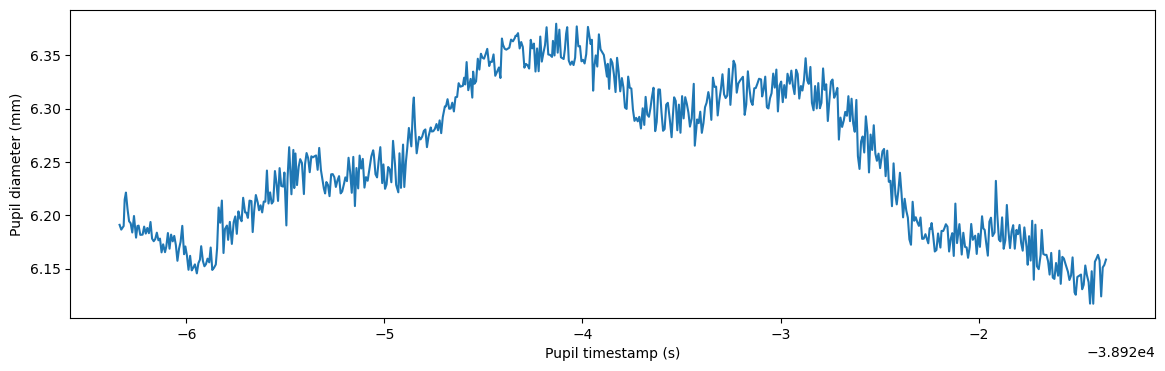

In [6]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')